In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import timeit
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [5]:
pd.set_option('display.max_columns', 60)

In [6]:
limit_rows   = 7000000
train           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)


/var/folders/54/86chlskx09z1cnlrwbx1g6g00000gp/T/ipykernel_70618/3775245202.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,


In [7]:
train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [8]:
train.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg', 
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

In [9]:
train.describe()

,Cust_ID,Relship_Status,Address_Type,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
count,7.000000e+06,6.972266e+06,6972266.0,6.935910e+06,6.972266e+06,5.747744e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,6.983937e+06,6.983937e+06,7.000000e+06
mean,8.054542e+05,1.153924e+00,1.0,2.657354e+01,4.899850e-01,1.342445e+05,1.187143e-04,2.742857e-05,7.032481e-01,4.322857e-04,8.619971e-02,1.035029e-02,9.888286e-03,1.464600e-01,4.819443e-02,2.814857e-03,2.023000e-03,4.870771e-02,8.829557e-02,2.063129e-02,6.750571e-03,1.035714e-02,2.923143e-03,5.629843e-02,4.993400e-02,2.796743e-02,4.389000e-03,5.948292e-02,6.457375e-02,1.367439e-01
std,4.220713e+05,3.880831e+00,0.0,1.274787e+01,4.998997e-01,2.293811e+05,1.089496e-02,5.237158e-03,4.568262e-01,2.078699e-02,2.806588e-01,1.012085e-01,9.894700e-02,3.535668e-01,2.141769e-01,5.298051e-02,4.493226e-02,2.152563e-01,2.837243e-01,1.421465e-01,8.188408e-02,1.012417e-01,5.398702e-02,2.304971e-01,2.178086e-01,1.648795e-01,6.610399e-02,2.365264e-01,2.457722e-01,3.435768e-01
min,1.588900e+04,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.206390e+05,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.877797e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.228030e+05,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.019684e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.169640e+06,1.000000e+00,1.0,3.400000e+01,1.000000e+00,1.561560e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.495489e+06,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Correlation Matrix - 

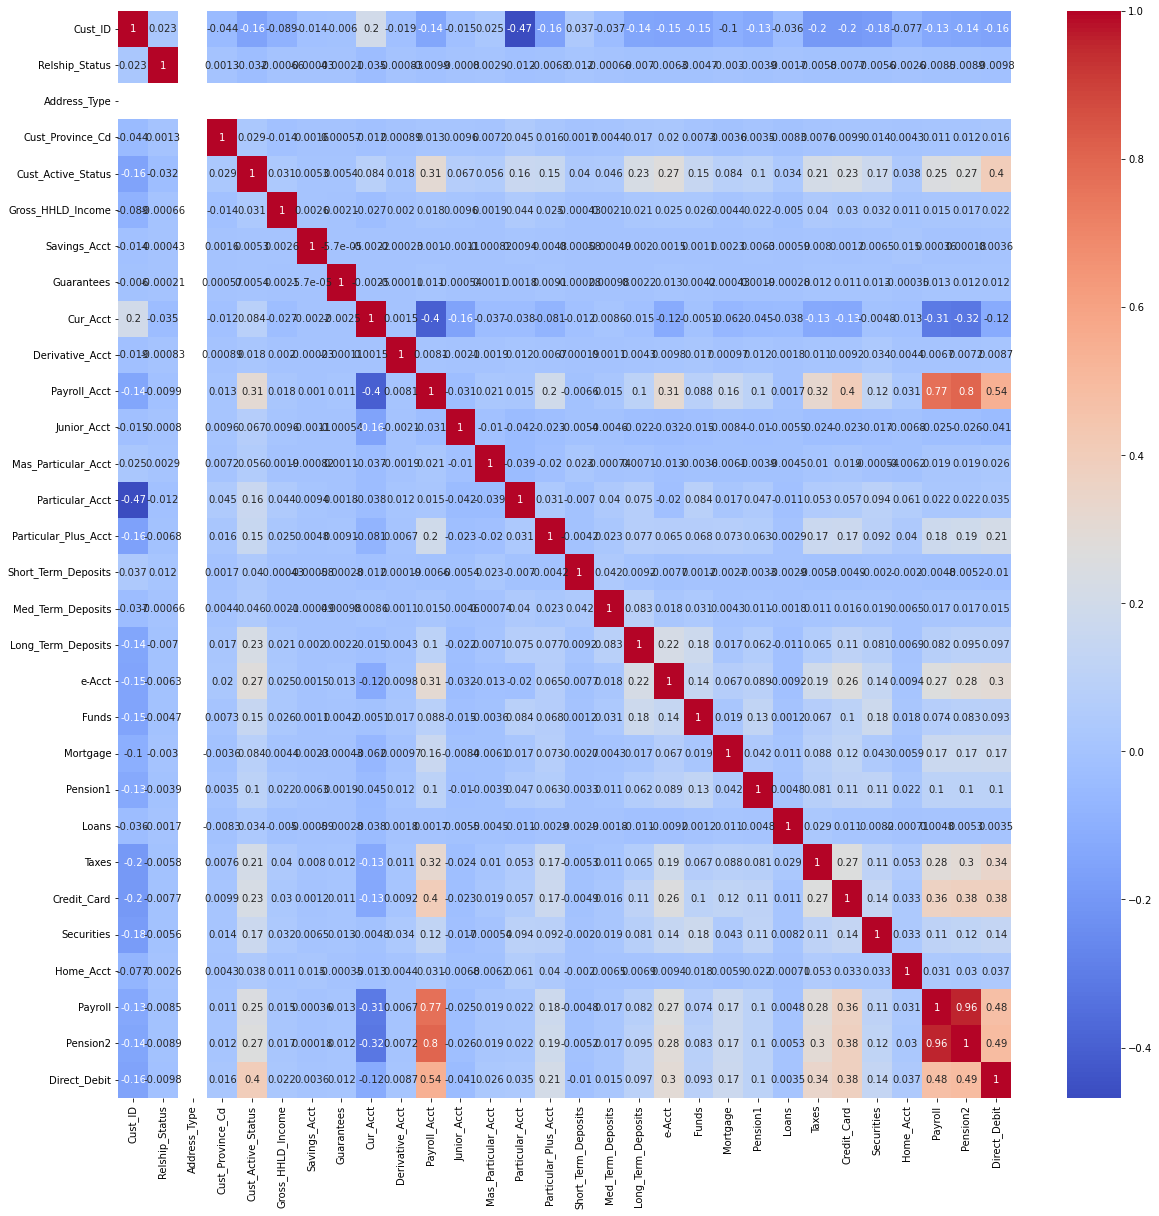

In [10]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
train = train.drop(['Pension2'], axis = 1)

## Convert DataTypes

In [12]:
train["Age"]   = pd.to_numeric(train["Age"], errors="coerce")
train["Cust_Since"]   = pd.to_numeric(train["Cust_Since"], errors="coerce")
train["Gross_HHLD_Income"]   = pd.to_numeric(train["Gross_HHLD_Income"], errors="coerce")


# Determining Irrelevant Features

Features to keep when modeling:
1. Emp_Status - An employee may have a higher chance of choosing certain products vs others
2. Residence_Ctry & Is_Foreigner - Where a customer lives and whether they are a Spanish national vs. expat is an important demographic indicator. They are also a more informative (less sparse) proxy to the Customer Country (Cust_Ctry), which is why we use these two columns vs that. 
3. Cust_Sex - Sex is a demographic signal that also likely has predictive power
4. Age - same logic for age (demographic indicator)
5. Cust_Since - the number of months a customer has been a customer is likely indicative of how many and what products they buy
6. Cust_Type_Mth_Beg & Cust_Relship_Type_Mth_Beg- more informative indicators of Relship_Status
7. Join_Channel - contextual indicator
8. Cust_Province_Cd - could be irrelevant, but probably is an important demographic indicator; people in certain areas may have more/less access & trust with Santander than others
9. Gross_HHLD_Income - demographic indicator
10. Cust_Segment - demographic indicator



Features to remove when modeling:
1. Status_Dt & Cust_ID have no relevance to the model
2. Join_Dt & Is_New_Cust are derivative of Cust_Since so there is no need for them
3. Relship_Status, Lst_Dt_Primary_Cust are both less informative derivatives of Cust_Type_Mth_Beg & Cust_Relship_Type_Mth_Beg
4. Cust_Ctry does not give as much information as whether someone is a resident of Spain, and whether they are a citizen of Spain (represented by Residence_Ctry & Is_Foreigner). Therefore we will forgoe using Cust_Ctry and use those other two features 
5. Relship_Status - Less informative proxy of Cust_Type_Mth_Beg & Cust_Relship_Type_Mth_Beg
6. Address_Type only has one class, so no real predictive power
7. Cust_Province_Name - string version of Cust_Province_Cd
8. Cust_Active_Status - Less informative proxy of Cust_Type_Mth_Beg & Cust_Relship_Type_Mth_Beg


Other changes:
1. Deceased_Flg - no need to make recommendations for those who are deceased, so we will test out whether removing them from data increases the performance of our models
2. May focus on only Spanish residents (Cust_Ctry == 'ES') because of the additional noise of macro socio-economic differences between countries (taxes, GDP/capita, pension laws, etc.)

In [13]:
unimportant_features = ['Status_Dt','Cust_ID','Join_Dt','Is_New_Cust','Relship_Status','Lst_Dt_Primary_Cust',
                       'Cust_Ctry','Relship_Status','Address_Type','Cust_Province_Name','Cust_Active_Status']

## Checking for Missing Values

In [14]:
#Finding the features that are important for the model and have some nans. Next we will decide what do do with 
#these features
train.columns[np.array(train.isnull().mean()!=0)&np.array([column not in unimportant_features for column in train.columns])]

Index(['Emp_Status', 'Cust_Sex', 'Age', 'Cust_Since', 'Cust_Type_Mth_Beg',
       'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner',
       'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 'Cust_Province_Cd',
       'Gross_HHLD_Income', 'Cust_Segment', 'Payroll'],
      dtype='object')

In [15]:
train.loc[:,['Emp_Status', 'Cust_Sex', 'Age', 'Cust_Since', 'Cust_Type_Mth_Beg',
       'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner',
       'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 'Cust_Province_Cd',
       'Gross_HHLD_Income', 'Cust_Segment', 'Payroll']].isnull().mean()

Emp_Status                   0.003962
Cust_Sex                     0.003967
Age                          0.003962
Cust_Since                   0.003962
Cust_Type_Mth_Beg            0.014972
Cust_Relship_Type_Mth_Beg    0.014972
Residence_Ctry               0.003962
Is_Foreigner                 0.003962
Is_Spouse_Emp                0.999857
Join_Channel                 0.017036
Deceased_Flg                 0.003962
Cust_Province_Cd             0.009156
Gross_HHLD_Income            0.178894
Cust_Segment                 0.017189
Payroll                      0.002295
dtype: float64

Strategy 1 for dealing with NaNs:
1. Drop the rows of all features where there are minimal nans (<2%)
2. For all features where there are <30%, >2% NaNs we will impute the median/mode (based on whether it is continuous or categorical)
3. We will drop all features with a large amount of nans (>30%)
4. Assume all output classes (products) with NaNs are 0. Essentially if we don't have information on whether a customer has a product, assume they don't

Strategy 2 for dealing with NaNs:
1. For all categorical features where there are minimal nans (<2%) we will drop their rows (mostly because we have a lot of data)
2. For all numeric features where we have nans we will impute the median
3. We will drop all features with a large amount of nans (>30%)
4. Assume all output classes (products) with NaNs are 0. Essentially if we don't have information on whether a customer has a product, assume they don't

In [16]:
train['Payroll'] = train['Payroll'].fillna(0)


median = train['Gross_HHLD_Income'].median()
train['Gross_HHLD_Income'] = train['Gross_HHLD_Income'].fillna(median)


#99% nan so we will drop
train.drop(columns=['Is_Spouse_Emp'], inplace=True)


#A is the most frequent category


train = train.dropna(subset = ['Emp_Status','Cust_Sex','Age','Cust_Since','Cust_Type_Mth_Beg', 'Cust_Relship_Type_Mth_Beg' , 'Residence_Ctry', 'Is_Foreigner', 'Join_Channel', 'Deceased_Flg','Cust_Province_Cd','Cust_Segment'])



In [17]:
train.loc[:,['Emp_Status', 'Cust_Sex', 'Age', 'Cust_Since', 'Cust_Type_Mth_Beg',
       'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner',
        'Join_Channel', 'Deceased_Flg', 'Cust_Province_Cd',
       'Gross_HHLD_Income', 'Cust_Segment', 'Payroll']].isnull().mean()


Emp_Status                   0.0
Cust_Sex                     0.0
Age                          0.0
Cust_Since                   0.0
Cust_Type_Mth_Beg            0.0
Cust_Relship_Type_Mth_Beg    0.0
Residence_Ctry               0.0
Is_Foreigner                 0.0
Join_Channel                 0.0
Deceased_Flg                 0.0
Cust_Province_Cd             0.0
Gross_HHLD_Income            0.0
Cust_Segment                 0.0
Payroll                      0.0
dtype: float64

# Splitting data into the actual training and test sets

In [18]:
train['Cust_Type_Mth_Beg'].unique()

array([1.0, 3.0, '1.0', '1', '3.0', '3'], dtype=object)

In [19]:
#Cleaning Cust_Type_Mth_Beg because it has mismatched datatypes
train['Cust_Type_Mth_Beg'] = train['Cust_Type_Mth_Beg'].apply(lambda x: x[0] if isinstance(x,str) else str(x)[0])

In [20]:
main_features = [ 'Age',
'Cust_Since',
'Gross_HHLD_Income',
'Emp_Status',
'Cust_Type_Mth_Beg',
'Cust_Relship_Type_Mth_Beg',
'Join_Channel',
'Cust_Province_Cd',
'Cust_Segment',
 'Residence_Ctry',
'Is_Foreigner',
'Deceased_Flg']

In [21]:
X_vals = train.loc[:,main_features]
y_vals = train.iloc[:,23:]

In [22]:
for c in y_vals.columns:
    print ("---- %s ---" % c)
    print (y_vals[c].value_counts())

---- Savings_Acct ---
0    6842170
1        831
Name: Savings_Acct, dtype: int64
---- Guarantees ---
0    6842818
1        183
Name: Guarantees, dtype: int64
---- Cur_Acct ---
1    4833835
0    2009166
Name: Cur_Acct, dtype: int64
---- Derivative_Acct ---
0    6839990
1       3011
Name: Derivative_Acct, dtype: int64
---- Payroll_Acct ---
0    6241026
1     601975
Name: Payroll_Acct, dtype: int64
---- Junior_Acct ---
0    6770927
1      72074
Name: Junior_Acct, dtype: int64
---- Mas_Particular_Acct ---
0    6774872
1      68129
Name: Mas_Particular_Acct, dtype: int64
---- Particular_Acct ---
0    5827677
1    1015324
Name: Particular_Acct, dtype: int64
---- Particular_Plus_Acct ---
0    6507161
1     335840
Name: Particular_Plus_Acct, dtype: int64
---- Short_Term_Deposits ---
0    6824509
1      18492
Name: Short_Term_Deposits, dtype: int64
---- Med_Term_Deposits ---
0    6829072
1      13929
Name: Med_Term_Deposits, dtype: int64
---- Long_Term_Deposits ---
0    6503982
1     339019
Nam

In [23]:
#stratified splitting based on Guarantees because it has the fewest 1's
X_dev, X_test, y_dev, y_test = train_test_split(X_vals, y_vals.to_numpy(),stratify=y_vals.to_numpy()[:,1], test_size=0.2)
X_train, X_val, y_train, y_val  = train_test_split(X_dev, y_dev,stratify=y_dev[:,1], test_size=0.25)

### Cateogorical Encoding of Variables

All Categorical features with only two classes or an order to their class will be ordinally encoded, while those with more than two classes that have no ordered meaning will be one hot encoded

In [24]:
passthrough_feats = []
numeric_feats = ['Age','Cust_Since','Gross_HHLD_Income']
ohe_feats = ['Emp_Status',
 'Cust_Type_Mth_Beg',
'Cust_Relship_Type_Mth_Beg',
'Join_Channel',
'Cust_Province_Cd',
'Cust_Segment']
ordinal_feats = [
 'Residence_Ctry','Is_Foreigner','Deceased_Flg']

In [25]:
ct = make_column_transformer(
(MinMaxScaler(), numeric_feats),
(OneHotEncoder(), ohe_feats),
(OrdinalEncoder(), ordinal_feats)
)

In [26]:
X_train = ct.fit_transform(X_train)
X_val = ct.transform(X_val)
X_test = ct.transform(X_test)

In [27]:
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

In [28]:
X_dev = ct.transform(X_dev)
X_dev = X_dev.toarray()

In [29]:
X_train.shape

(4105800, 231)

# Deep NN

In [170]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import random

In [146]:
def apk(actual, predicted, k):
    num_actual_products = sum(actual)
    expected_products = np.where(actual==1)[0]
    precision_at_k = []
    for i in range(1,k+1):
        num_hits = sum([recommended_product in expected_products 
             for recommended_product in np.argsort(predicted)[-i:]])
        proportion_of_hits = num_hits/i
        precision_at_k.append(proportion_of_hits*(np.argsort(predicted)[-i:][0] in expected_products))
    return sum(precision_at_k)/min(k,num_actual_products) if min(k,num_actual_products)!= 0 else 0

def mapk(actual, predicted, k):
    average_precisions = []
    i = 0
    start = timeit.default_timer()
    for a,p in zip(actual, predicted):
        average_precisions.append(apk(a,p,k))
        i+=1
        if i%100000 == 0:
            stop = timeit.default_timer()
            print(f"{stop-start} - {i} predictions have been processed with a MAP of {np.mean(average_precisions)}")
            start = timeit.default_timer()
            break
    return np.mean(average_precisions)

In [ ]:
# hidden_1_size = [25,75,125,250]
# hidden_2_size = [25,75,125,250]
# activation_function_1 = ['relu','sigmoid']
# activation_function_2 = ['relu','sigmoid']


In [154]:
all_scores = []
for hidden_1_size in np.arange(25,150,50):
    for hidden_2_size in np.arange(25,150,50):
        start = timeit.default_timer()
        input_dim = X_train.shape[1]  # Number of features
        recommendationEngine = Sequential()
        recommendationEngine.add(Dense(hidden_1_size, input_dim=input_dim, activation='sigmoid'))
        recommendationEngine.add(Dense(hidden_2_size, activation='relu'))
        recommendationEngine.add(Dense(y_train.shape[1], activation='softmax'))
        recommendationEngine.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
        history_callback = recommendationEngine.fit(X_train,y_train,batch_size = 16384, epochs = 1, verbose = 1, validation_split = .2)
        predictions = recommendationEngine.predict(X_val,verbose=1)
        score = mapk(y_val, predictions, 7)
        row = {'hidden_1_size':hidden_1_size,'hidden_2_size':hidden_2_size,'score':score}
        stop = timeit.default_timer()
        print(stop-start,row)
        all_scores.append(row)

2023-04-27 11:48:43.300197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 3.7967 - categorical_accuracy: 0.6185

2023-04-27 11:48:46.953337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  128/42769 [..............................] - ETA: 51s

2023-04-27 11:48:48.446190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 45s 1ms/step
7.2864809580023575 - 100000 predictions have been processed with a MAP of 0.6735369052154195
62.91613179200067 {'hidden_1_size': 25, 'hidden_2_size': 25, 'score': 0.6735369052154195}


2023-04-27 11:49:46.017550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


198/201 [============================>.] - ETA: 0s - loss: 3.6732 - categorical_accuracy: 0.6770

2023-04-27 11:49:49.626077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  131/42769 [..............................] - ETA: 50s

2023-04-27 11:49:51.115104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 52s 1ms/step
7.640740708997328 - 100000 predictions have been processed with a MAP of 0.6821442891156463
70.2457108330018 {'hidden_1_size': 25, 'hidden_2_size': 75, 'score': 0.6821442891156463}


2023-04-27 11:50:56.259624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


200/201 [============================>.] - ETA: 0s - loss: 3.8871 - categorical_accuracy: 0.6810

2023-04-27 11:51:00.705012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  121/42769 [..............................] - ETA: 56s

2023-04-27 11:51:02.465096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 44s 1ms/step
7.543289917000948 - 100000 predictions have been processed with a MAP of 0.6760646006802721
63.998043458999746 {'hidden_1_size': 25, 'hidden_2_size': 125, 'score': 0.6760646006802721}


2023-04-27 11:52:00.457207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 3.9708 - categorical_accuracy: 0.6640

2023-04-27 11:52:04.259280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  122/42769 [..............................] - ETA: 53s

2023-04-27 11:52:05.876203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 46s 1ms/step
7.433338750000985 - 100000 predictions have been processed with a MAP of 0.6685884263038548
64.8238035409995 {'hidden_1_size': 75, 'hidden_2_size': 25, 'score': 0.6685884263038548}


2023-04-27 11:53:04.834868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 4.4215 - categorical_accuracy: 0.6842

2023-04-27 11:53:08.983016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  120/42769 [..............................] - ETA: 54s

2023-04-27 11:53:10.487256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 44s 1ms/step
7.498701458000141 - 100000 predictions have been processed with a MAP of 0.6769531225623583
61.87174283299828 {'hidden_1_size': 75, 'hidden_2_size': 75, 'score': 0.6769531225623583}


2023-04-27 11:54:07.103792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


200/201 [============================>.] - ETA: 0s - loss: 4.6781 - categorical_accuracy: 0.6907

2023-04-27 11:54:10.841235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  143/42769 [..............................] - ETA: 45s

2023-04-27 11:54:12.204952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 45s 1ms/step
7.470949500002462 - 100000 predictions have been processed with a MAP of 0.6752856225623581
63.85716616699938 {'hidden_1_size': 75, 'hidden_2_size': 125, 'score': 0.6752856225623581}


2023-04-27 11:55:10.531676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


200/201 [============================>.] - ETA: 0s - loss: 4.3078 - categorical_accuracy: 0.6479

2023-04-27 11:55:14.394059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  129/42769 [..............................] - ETA: 50s

2023-04-27 11:55:15.764284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 46s 1ms/step
7.633976290999271 - 100000 predictions have been processed with a MAP of 0.6845335258503402
64.54664625000078 {'hidden_1_size': 125, 'hidden_2_size': 25, 'score': 0.6845335258503402}


2023-04-27 11:56:15.619234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


198/201 [============================>.] - ETA: 0s - loss: 5.3614 - categorical_accuracy: 0.6815

2023-04-27 11:56:19.384089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  124/42769 [..............................] - ETA: 52s

2023-04-27 11:56:20.945063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 45s 1ms/step
7.4975773750011285 - 100000 predictions have been processed with a MAP of 0.6746264884353741
63.37006079099956 {'hidden_1_size': 125, 'hidden_2_size': 75, 'score': 0.6746264884353741}


2023-04-27 11:57:18.568728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 5.2992 - categorical_accuracy: 0.6975

2023-04-27 11:57:22.590815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  128/42769 [..............................] - ETA: 51s

2023-04-27 11:57:24.256721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 45s 1ms/step
7.5633902920017135 - 100000 predictions have been processed with a MAP of 0.6751913804988664
62.993031417001475 {'hidden_1_size': 125, 'hidden_2_size': 125, 'score': 0.6751913804988664}


In [155]:
pd.DataFrame(all_scores)

,hidden_1_size,hidden_2_size,score
0,25,25,0.673537
1,25,75,0.682144
2,25,125,0.676065
3,75,25,0.668588
4,75,75,0.676953
5,75,125,0.675286
6,125,25,0.684534
7,125,75,0.674626
8,125,125,0.675191


In [156]:
input_dim = X_train.shape[1]  # Number of features
recommendationEngine = Sequential()
recommendationEngine.add(Dense(125, input_dim=input_dim, activation='sigmoid'))
recommendationEngine.add(Dense(25, activation='relu'))
recommendationEngine.add(Dense(y_train.shape[1], activation='softmax'))

In [157]:
recommendationEngine.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [158]:
history_callback = recommendationEngine.fit(X_dev,y_dev,batch_size = 16384, epochs = 1, verbose = 1, validation_split = .2)

2023-04-27 12:13:49.206497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 4.3121 - categorical_accuracy: 0.6476

2023-04-27 12:13:52.959456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - 5s 18ms/step - loss: 4.3121 - categorical_accuracy: 0.6476 - val_loss: 5.9682 - val_categorical_accuracy: 0.7065


In [159]:
predictions = recommendationEngine.predict(X_test,verbose=1)

  119/42769 [..............................] - ETA: 54s

2023-04-27 12:13:57.981504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42769/42769 [==============================] - 46s 1ms/step


In [160]:
score = mapk(y_test, predictions, 7)

7.366792125001666 - 100000 predictions have been processed with a MAP of 0.6839857404195011


In [161]:
print(f'We have run 100000 test values throught the model and have received a MAP@7 of: {score}. We stopped at 100000 because the MAP score changes minimally over a larger amount of predictions - law of averages')

We have run 100000 test values throught the model and have received a MAP@7 of: 0.6839857404195011. We stopped at 100000 because the MAP score changes minimally over a larger amount of predictions - law of averages


# XGBoost Training

In [163]:
np.logspace(-2,0,3)

array([0.01, 0.1 , 1.  ])

In [175]:
learning_rates = [.1,.3,.7]
max_depths = [1,3,6]
percent_columns_sampled = [.25,.5,.75,1]
percent_rows_sampled = [.25,.5,.75,1]

In [176]:
all_possible_hps = [{'learning_rate':learning_rate,'max_depth':max_depth,'percent_columns':percent_columns,'percent_rows':percent_rows}
for learning_rate in learning_rates 
for max_depth in max_depths 
for percent_columns in percent_columns_sampled
for percent_rows in percent_rows_sampled]

In [178]:
tested_hyperparameters = random.choices(all_possible_hps,k=10)

In [179]:
all_scores = []
for hyperparameter in tested_hyperparameters:
    start_time = timeit.default_timer()
    XGB_clf = XGBClassifier(max_depth=hyperparameter['max_depth'],
                            colsample_bytree=hyperparameter['percent_columns'],
                            subsample=hyperparameter['percent_rows'],
                            eta=hyperparameter['learning_rate'])
    XGB_clf.fit(X_train[0:100000], y_train[0:100000])
    predictions_XGB = XGB_clf.predict_proba(X_val[0:100000])
    score = mapk(y_val, predictions_XGB, 7)
    hyperparameter['score'] = score
    all_scores.append(hyperparameter)
    # cross_val_scores = cross_val_score(XGB_clf, X_dev, y_dev, cv=2)
    end_time = timeit.default_timer()
    print(end_time-start_time, hyperparameter)

7.4378772910022235 - 100000 predictions have been processed with a MAP of 0.7465581856009071
151.44486358299764 {'learning_rate': 0.1, 'max_depth': 6, 'percent_columns': 0.5, 'percent_rows': 0.5, 'score': 0.7465581856009071}
7.6245240829994145 - 100000 predictions have been processed with a MAP of 0.7426874979591837
64.58909012500226 {'learning_rate': 0.3, 'max_depth': 1, 'percent_columns': 1, 'percent_rows': 0.5, 'score': 0.7426874979591837}
7.746085833001416 - 100000 predictions have been processed with a MAP of 0.7451006482993195
87.4684331669996 {'learning_rate': 0.1, 'max_depth': 3, 'percent_columns': 0.75, 'percent_rows': 0.25, 'score': 0.7451006482993195}
7.4025469580010395 - 100000 predictions have been processed with a MAP of 0.745671810770975
84.72809395800141 {'learning_rate': 0.1, 'max_depth': 6, 'percent_columns': 0.25, 'percent_rows': 1, 'score': 0.745671810770975}


KeyboardInterrupt: 

In [185]:
pd.DataFrame(all_scores)

,learning_rate,max_depth,percent_columns,percent_rows,score
0,0.1,6,0.50,0.50,0.746558
1,0.3,1,1.00,0.50,0.742687
2,0.1,3,0.75,0.25,0.745101
3,0.1,6,0.25,1.00,0.745672


In [181]:
XGB_clf = XGBClassifier(max_depth=6,
                        colsample_bytree=.75,
                        subsample=.75,
                        eta=.1)
XGB_clf.fit(X_dev[0:100000], y_dev[0:100000])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [182]:
predictions_XGB = XGB_clf.predict_proba(X_test[0:100000])

In [183]:
score = mapk(y_test, predictions_XGB, 7)

7.504394042000058 - 100000 predictions have been processed with a MAP of 0.7465173225056688


In [184]:
print(f'We have run 100000 test values throught the model and have received a MAP@7 of: {score}. We stopped at 100000 because the MAP score changes minimally over a larger amount of predictions - law of averages')

We have run 100000 test values throught the model and have received a MAP@7 of: 0.7465173225056688. We stopped at 100000 because the MAP score changes minimally over a larger amount of predictions - law of averages


## Graphs and distribution

### Visualising the distribution of each product by age by boxplot¶


/Users/sanmatichoudhary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='train age'>

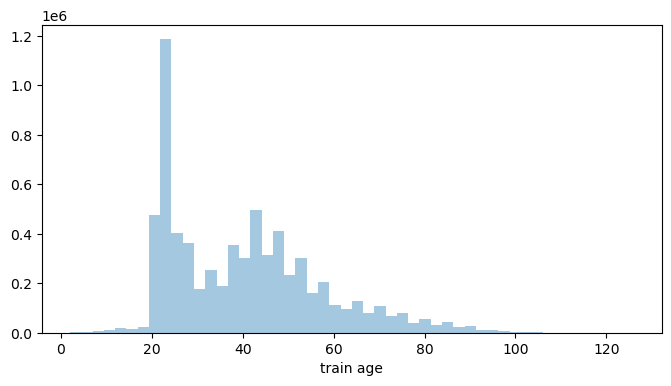

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

sns.distplot(train.Age[(train.Age>=0) & (train.Age<=130)], kde=False, ax=axes, axlabel='train age')


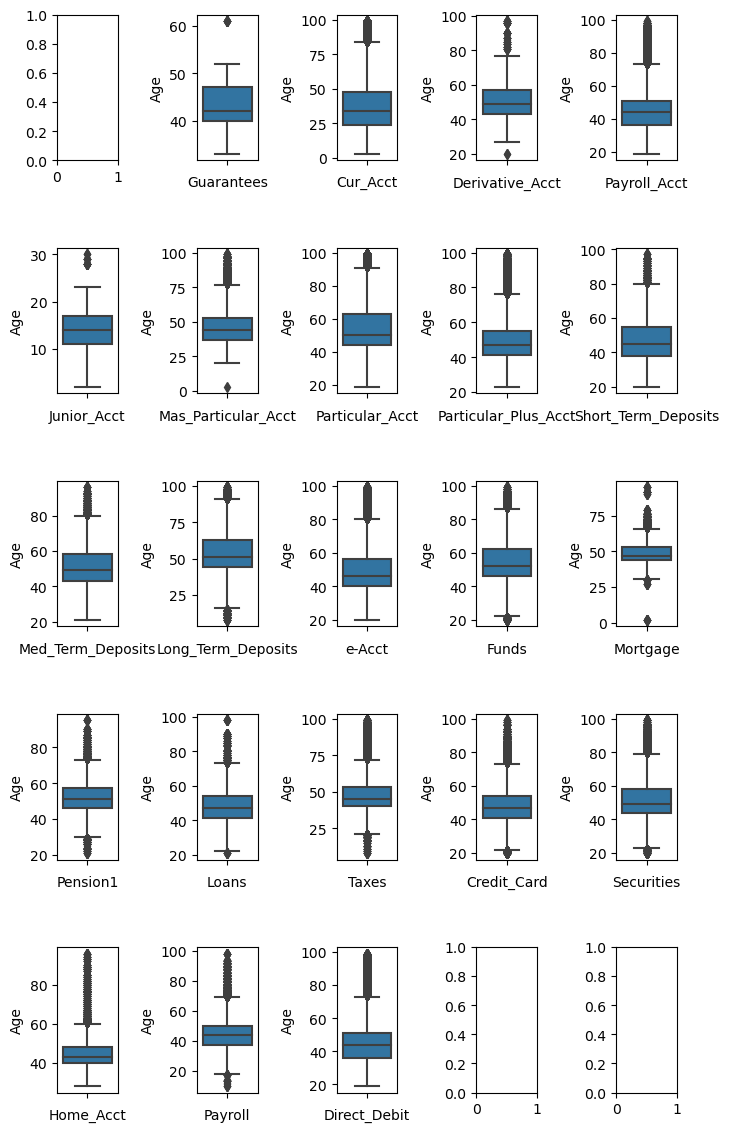

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8,14))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label=train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%5
    box_plot=sns.boxplot(y='Age', data=train[(train[feat]==1) &
    (train['Age']>0) & (train['Age']<100)], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

### Distribution of product by Cod_prov¶


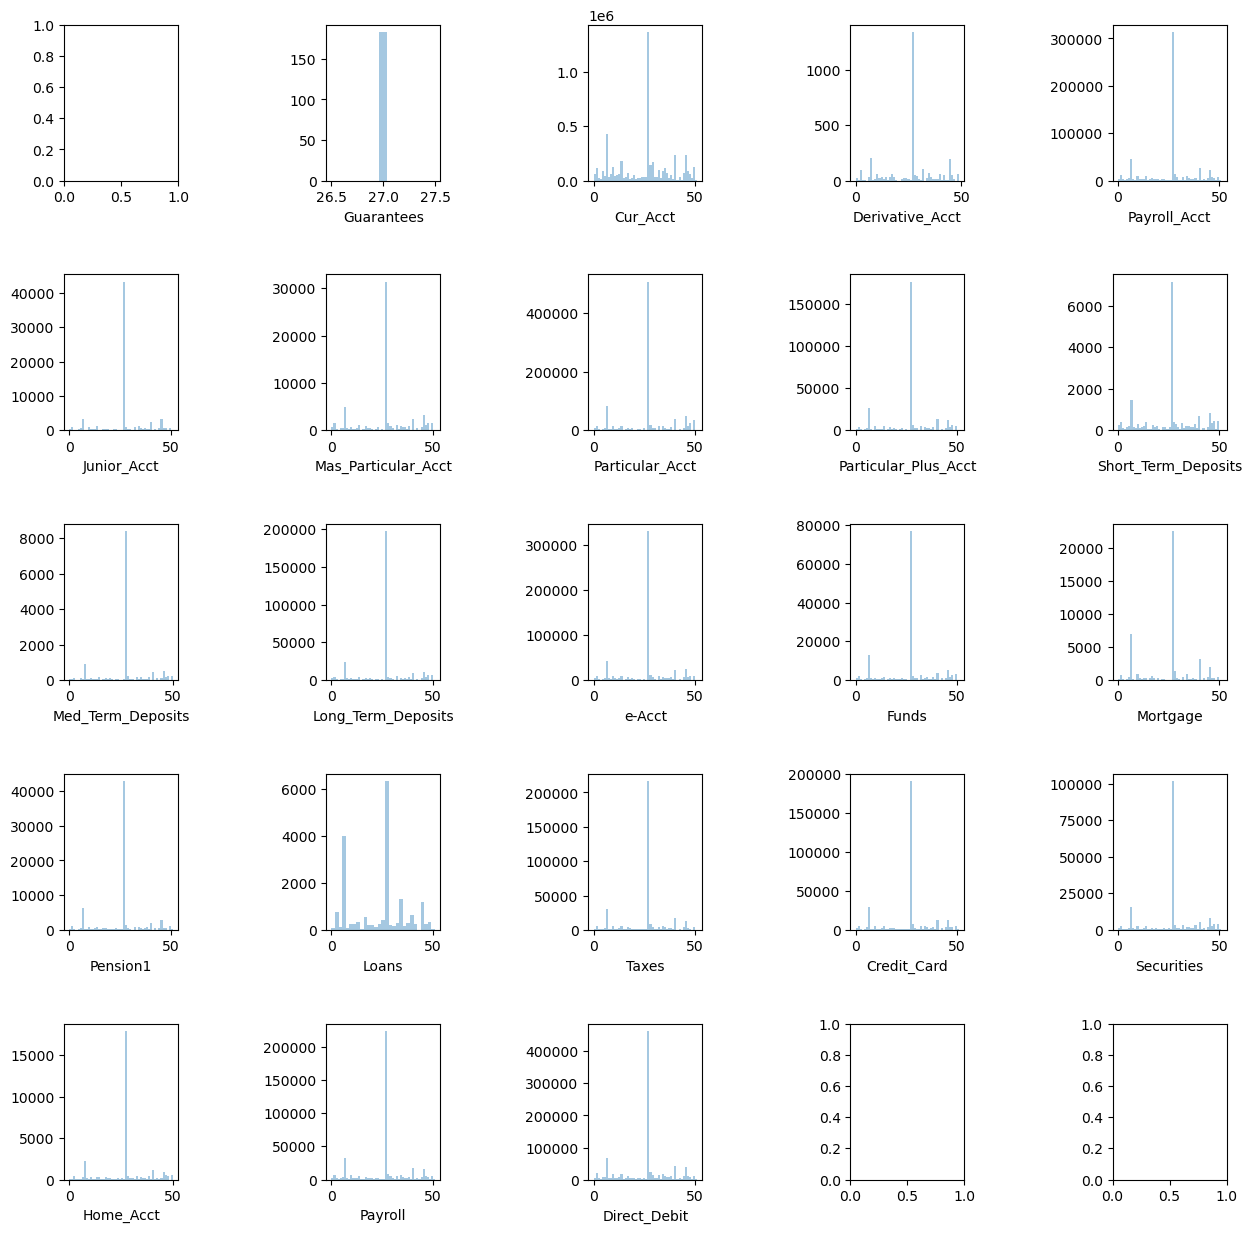

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label=train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%5
    sns.distplot(train.Cust_Province_Cd[(train[feat]==1) & (train['Cust_Province_Cd']>=0)], kde=False, 
                 axlabel=fig_label, ax=axes[fig_row][fig_col])   
    if fig_col==4: fig_row+=1


### Distribution of product among different genders¶


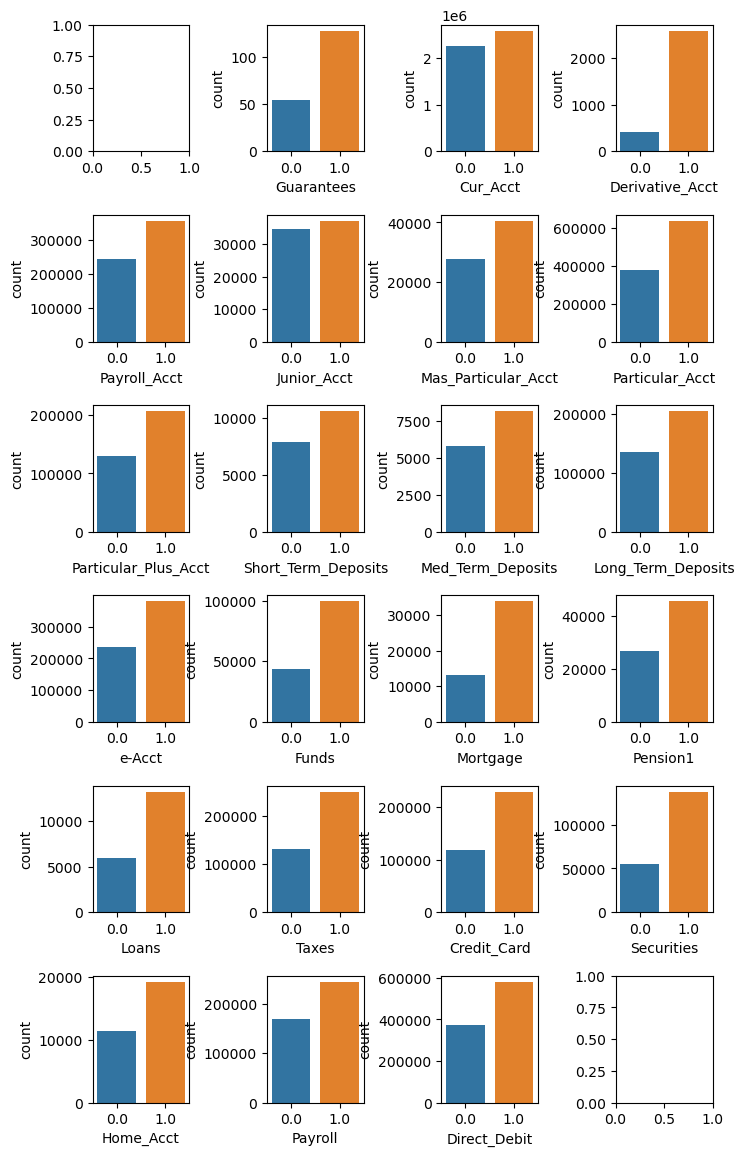

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label= train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%4
    countplot=sns.countplot(x='Cust_Sex', data=train[(train[feat]==1) & (train['Cust_Sex']>=0)],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1
        

### Transform Test Data

In [83]:
limit_rows   = 7000000

test = pd.read_csv("test_ver2.csv",dtype={"sexo":str,
                                             "ind_nuevo":str,
                                               "ult_fec_cli_1t":str,
                                                "indext":str}, nrows=limit_rows)

/var/folders/54/86chlskx09z1cnlrwbx1g6g00000gp/T/ipykernel_1537/2567022275.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("test_ver2.csv",dtype={"sexo":str,


In [85]:
test

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0,206,1,NaN,1.0,A,S,N,NaN,KAT,N,1,28.0,MADRID,1,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0,115,1,NaN,1.0,I,S,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0,115,1,NaN,1.0,A,S,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0,115,1,NaN,1.0,I,S,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.88,02 - PARTICULARES


In [84]:
test.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg', 
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

ValueError: Length mismatch: Expected axis has 24 elements, new values have 48 elements

In [ ]:
test = test.drop(['Pension2'], axis = 1)

In [ ]:
test["Age"] = pd.to_numeric(test["Age"], errors="coerce")
test["Cust_Since"] = pd.to_numeric(test["Cust_Since"], errors="coerce")
test["Gross_HHLD_Income"] = pd.to_numeric(test["Gross_HHLD_Income"], errors="coerce")


In [ ]:
test['Is_New_Cust'] = test['Is_New_Cust'].fillna(1)

median = test['Gross_HHLD_Income'].median()
test['Gross_HHLD_Income'] = test['Gross_HHLD_Income'].fillna(median)

#99%
test.drop(columns=['Lst_Dt_Primary_Cust','Is_Spouse_Emp'], inplace=True)
test.drop(columns=['Cust_Ctry'], inplace=True)

test['Payroll'] = test['Payroll'].fillna(0)

#A is the most frequent category

test = test.dropna(subset = ['Cust_Type_Mth_Beg', 'Cust_Relship_Type_Mth_Beg' , 'Cust_Province_Name', 'Cust_Province_Cd', 'Join_Channel', 'Cust_Segment', 'Cust_Sex'])

In [ ]:
test.isnull().mean() * 100


In [ ]:
#Categorical Encoding:
oe = OrdinalEncoder()
features = ['Cust_Sex', 'Join_Channel', 'Cust_Segment', 'Cust_Province_Cd']
test = oe.fit_transform(test[features])

In [ ]:
train.shape

In [ ]:
#Get rid of the ages 30 and 40 - stratify 

In [ ]:
#todo - fix the test data 


In [ ]:
#map to english transaltion

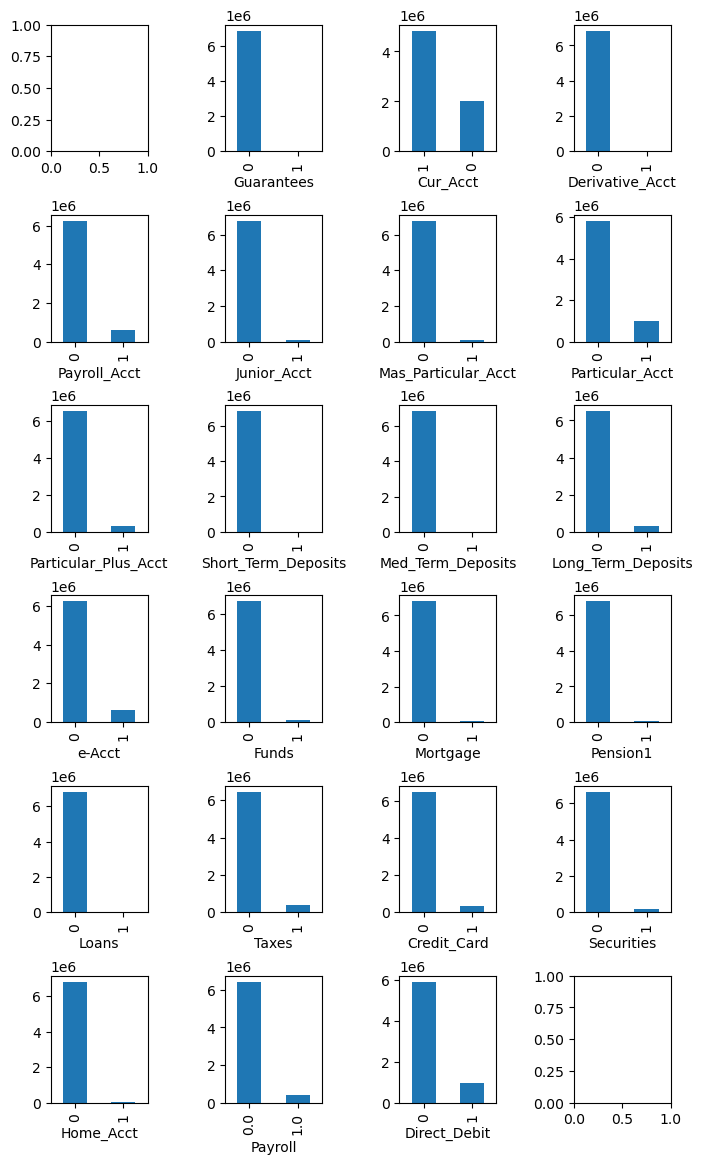

In [69]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label= train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%4
    value_counts = train.iloc[:, col_id].value_counts()
    value_counts.plot(kind='bar', ax = axes[fig_row, fig_col])
    axes[fig_row, fig_col].set_xlabel(fig_label)
    if fig_col==3: fig_row+=1
        
plt.show()

        
# for col_id in range(22, 44):
#     x = train.columns[col_id]
#     print(train[x].value_counts())
    

# XGBoost